In [1]:
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('../input'))



../input/traffic-signs-preprocessed/mean_image_rgb.pickle
../input/traffic-signs-preprocessed/data5.pickle
../input/traffic-signs-preprocessed/data4.pickle
../input/traffic-signs-preprocessed/data7.pickle
../input/traffic-signs-preprocessed/data8.pickle
../input/traffic-signs-preprocessed/data1.pickle
../input/traffic-signs-preprocessed/data3.pickle
../input/traffic-signs-preprocessed/test.pickle
../input/traffic-signs-preprocessed/mean_image_gray.pickle
../input/traffic-signs-preprocessed/data6.pickle
../input/traffic-signs-preprocessed/data0.pickle
../input/traffic-signs-preprocessed/valid.pickle
../input/traffic-signs-preprocessed/data2.pickle
../input/traffic-signs-preprocessed/labels.pickle
../input/traffic-signs-preprocessed/datasets_preparing.py
../input/traffic-signs-preprocessed/std_gray.pickle
../input/traffic-signs-preprocessed/std_rgb.pickle
../input/traffic-signs-preprocessed/label_names.csv
../input/traffic-signs-preprocessed/train.pickle
../input/traffic-signal-data-set/

In [2]:
with open('../input/traffic-signs-preprocessed/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  

data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)


y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


(81, 32, 32, 3)


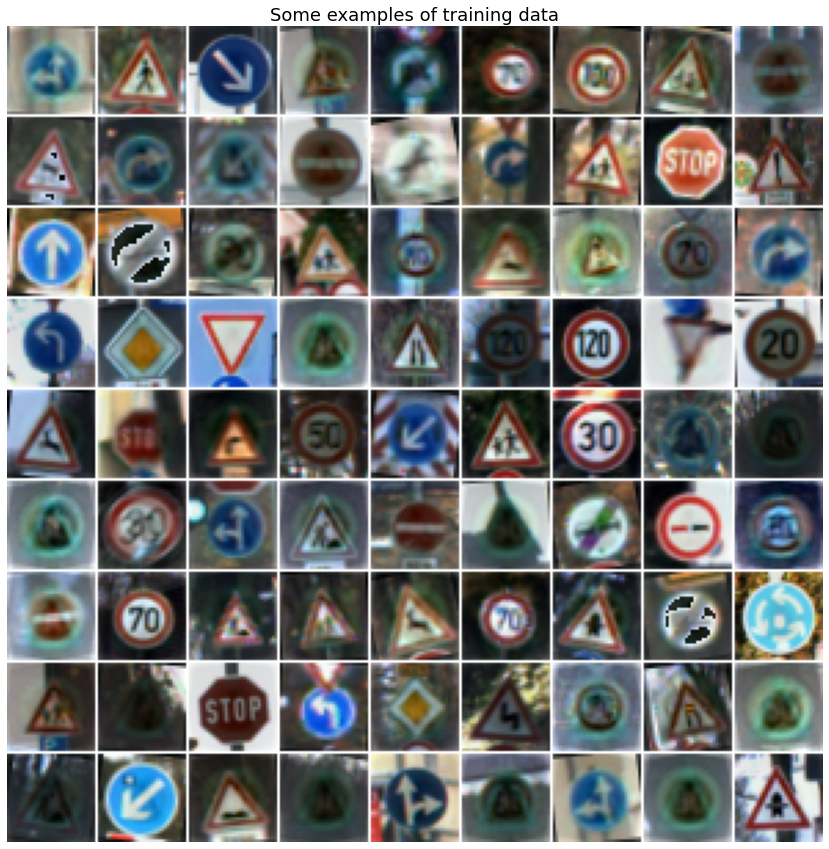

In [3]:
%matplotlib inline

def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid


examples = data['x_train'][:81, :, :, :]
print(examples.shape)  


fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

plt.show()
fig.savefig('training_examples.png')
plt.close()


In [4]:



model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2021-12-09 06:28:24.987347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 06:28:25.086515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 06:28:25.087199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 06:28:25.088531: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 10


h = model.fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)



2021-12-09 06:28:28.073667: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1068920832 exceeds 10% of free system memory.
2021-12-09 06:28:29.168269: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1068920832 exceeds 10% of free system memory.
2021-12-09 06:28:29.966642: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-09 06:28:31.167996: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


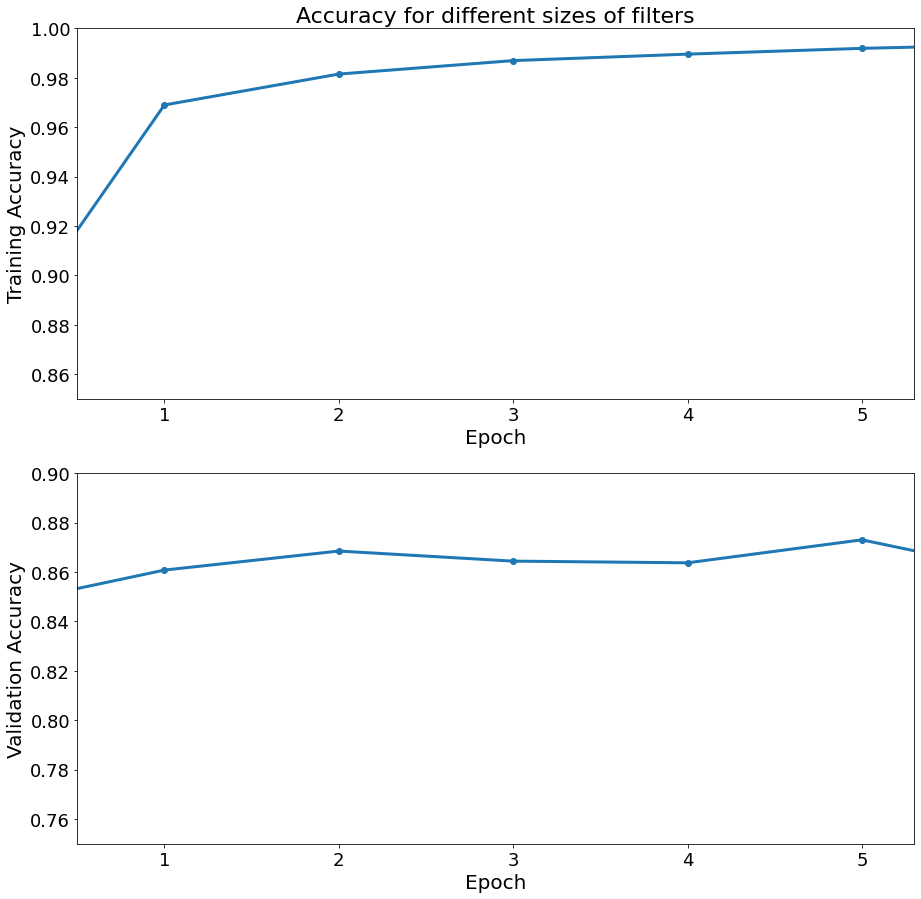

data2 filter 3 training accuracy = 0.99614

data2 filter 3 validation accuracy = 0.87619


In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear') 
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('models_accuracy.png')
plt.close()



print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(3, np.max(h.history['accuracy'])))

print()
print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(3, np.max(h.history['val_accuracy'])))


In [9]:

temp = model.predict(data['x_test'])
temp = np.argmax(temp, axis=1)
temp = np.mean(temp == data['y_test'])
    
print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(3, temp))


data2 filter 3 testing accuracy = 0.86960


In [10]:
start = timer()
temp = model.predict(data['x_test'][:1, :, :, :])
end = timer()
    
print('data2 filter {0:d} classification time = {1:.5f}'.format(3, end - start))


data2 filter 3 classification time = 0.05474


(3, 3, 3, 32)
(32, 3, 3, 3)


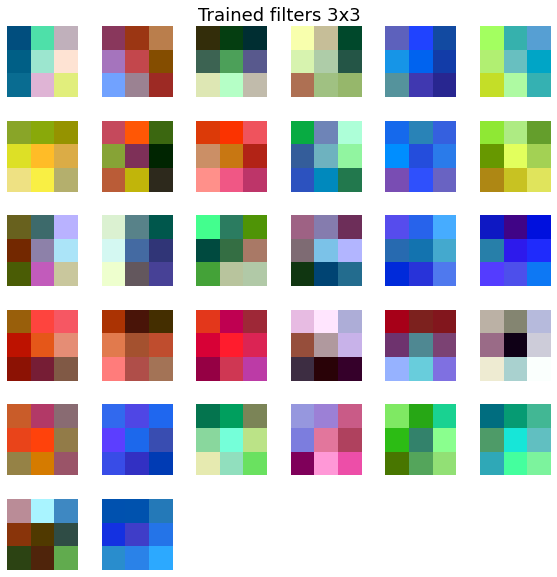

In [11]:
w = model.get_weights()
print(w[0].shape)
temp = w[0].transpose(3, 0, 1, 2)
print(temp.shape)  
fig = plt.figure()
grid = convert_to_grid(temp)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
name = 'Trained filters ' + str(3) + 'x' + str(3)
plt.title(name, fontsize=18)
plt.show()
name = 'filters-' + str(3) + 'x' + str(3) + '.png'
fig.savefig(name)
plt.close()


(1, 32, 32, 3)
[3]


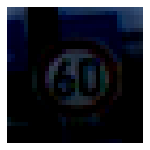

(43,)
ClassId: 3
Label: Speed limit (60km/h)


In [12]:
%matplotlib inline
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) 
plt.imshow(x_input[0, :, :, :])
plt.axis('off')
plt.show()

scores = model.predict(x_input)
print(scores[0].shape) 

prediction = np.argmax(scores)
print('ClassId:', prediction)

def label_text(file):
    label_list = []
    r = pd.read_csv(file)
    for name in r['SignName']:
        label_list.append(name)
    return label_list


labels = label_text('../input/traffic-signs-preprocessed/label_names.csv')

print('Label:', labels[prediction])


In [13]:
name = 'model-' + str(3) + 'x' + str(3) + '.h5'
model.save(name)